# Session 8
## Scraping 1 - Data Collection
*Snorre Ralund *

## Motivation
<table><tr><td><img src='https://i.imgflip.com/2fg9un.jpg' style="width: 400px;"></td><td><img src='http://bigdataanalyticsnews.com/wp-content/uploads/2013/11/big-data.png' style="width: 400px;"></td></tr></table>

Getting information and data on a subject of interest is no longer reduced to *tedious* survey designs, and *expensive* collections, *time consuming* interviews and *standardized* register data. 

This session will teach you how to harvest some of the billions of data points being generated and shared on the internet everyday.

** We need data now! fast, free of charge, and in abundance.**


## Agenda
**Collecting raw data** (*Tomorrow we shall focus on parsing and cleaning*)

* The basics of webscraping
    * Connecting, Crawling, Parsing, Storing, Logging.
* Hands-on examples.
* Ethical and Legal issues around scraping publicly available data.
* Hacks: Backdoors, url construction and analyzing webpages.
* Reliability of your data collection.

**Main take-aways**
- Utilize the data sources around you. Combine them to reach new potentials. 
- Knowing how to build your own custom datasets from web sources, without having to spend a month manually curating the data.
- Get to know some of the most valuable tricks, 
- And instructions on how to Handle with care.

<img src="https://i.imgflip.com/2fgdqb.jpg" title="made at imgflip.com"/></a>


## Ethics / Legal Issues
* If a regular user can’t access it, we shouldn’t try to get it (That is considered hacking)https://www.dr.dk/nyheder/penge/gjorde-opmaerksom-paa-cpr-hul-nu-bliver-han-politianmeldt-hacking. 
* Don't hit it to fast: Essentially a DENIAL OF SERVICE attack (DOS). [Again considered hacking](https://www.dr.dk/nyheder/indland/folketingets-hjemmeside-ramt-af-hacker-angreb). 
* Add headers stating your name and email with your requests to ensure transparency. 
* Be careful with copyrighted material.
* Fair use (don't take everything)
* If monetizing on the data, be careful not to be in direct competition with whom you are taking the data from.

<img src="https://github.com/snorreralund/images/raw/master/Sk%C3%A6rmbillede%202017-08-03%2014.46.32.png"/>

### Packages used
Today we will mainly build on the python skills you have gotten so far, and tomorrow we will look into more specialized packages.

* for connecting to the internet we use: **requests**
* for parsing: **beautifulsoup** and **regex**
* for automatic browsing / screen scraping (not covered in detail here): **selenium** 
* for behaving responsibly we use: **time** and ***our minds***

We will write our scrapers with basic python, for larger projects consider looking into the packages **scrapy** or **pyspider**

In [1]:
import requests, re, time
from bs4 import BeautifulSoup

# quick 101

To scrape information from the web is:

	    1. Finding URLs of the pages containing the information you want.
	    2. Fetching the pages via HTTP.
	    3. Extracting the information from HTML.
	    4. Finding more URL containing what you want, go back to 2.


**Connecting to the internet**
**HTTP**

*URL* : the adressline in our browser.

Via HTTP we send a **get** request to an *address* with *instructions* ( - or rather our dns service provider redirects our request to the right address)

*Address*: www.google.com

*Instructions*: /trends?query=social+data+science

*Header*: information send along with the request, including user agent (operating system, browser), cookies, and prefered encoding.

*HTML*: HyperTextMarkupLanguage the language of displaying web content. More on this tomorrow.



**Now** we are ready to get some data 

## **3 basic examples**
Lets get some action.

### ** collecting data on display **
** static webpage example **

visit the following website (https://www.basketball-reference.com/leagues/NBA_2018.html).

The page displays tables of data that we want to collect.
Tomorrow you will see how to parse such a table, but for now I want to show you a neat function that has already implemented this.

In [6]:
url = 'https://www.basketball-reference.com/leagues/NBA_2018.html' # link to the website
import pandas as pd 
#dfs = pd.read_html(url) #parses all tables found on the page.
dfs[0]

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Toronto Raptors* (1),59,23,0.720,—,111.7,103.9,7.29
1,Boston Celtics* (2),55,27,0.671,4.0,104.0,100.4,3.23
2,Philadelphia 76ers* (3),52,30,0.634,7.0,109.8,105.3,4.30
3,Cleveland Cavaliers* (4),50,32,0.610,9.0,110.9,109.9,0.59
4,Indiana Pacers* (5),48,34,0.585,11.0,105.6,104.2,1.18
5,Miami Heat* (6),44,38,0.537,15.0,103.4,102.9,0.15
6,Milwaukee Bucks* (7),44,38,0.537,15.0,106.5,106.8,-0.45
7,Washington Wizards* (8),43,39,0.524,16.0,106.6,106.0,0.53
8,Detroit Pistons (9),39,43,0.476,20.0,103.8,103.9,-0.26
9,Charlotte Hornets (10),36,46,0.439,23.0,108.2,108.0,0.07


In [78]:
EC_df = pd.read_html(url,attrs={'id':'confs_standings_E'}) # only parse the tables with attribute confs_standings_E

[          Eastern Conference   W   L   W/L%    GB   PS/G   PA/G   SRS
 0       Toronto Raptors* (1)  59  23  0.720     —  111.7  103.9  7.29
 1        Boston Celtics* (2)  55  27  0.671   4.0  104.0  100.4  3.23
 2    Philadelphia 76ers* (3)  52  30  0.634   7.0  109.8  105.3  4.30
 3   Cleveland Cavaliers* (4)  50  32  0.610   9.0  110.9  109.9  0.59
 4        Indiana Pacers* (5)  48  34  0.585  11.0  105.6  104.2  1.18
 5            Miami Heat* (6)  44  38  0.537  15.0  103.4  102.9  0.15
 6       Milwaukee Bucks* (7)  44  38  0.537  15.0  106.5  106.8 -0.45
 7    Washington Wizards* (8)  43  39  0.524  16.0  106.6  106.0  0.53
 8        Detroit Pistons (9)  39  43  0.476  20.0  103.8  103.9 -0.26
 9     Charlotte Hornets (10)  36  46  0.439  23.0  108.2  108.0  0.07
 10      New York Knicks (11)  29  53  0.354  30.0  104.5  108.0 -3.53
 11        Brooklyn Nets (12)  28  54  0.341  31.0  106.6  110.3 -3.67
 12        Chicago Bulls (13)  27  55  0.329  32.0  102.9  110.0 -6.84
 13   

### ** collecting data behind the display**
** dynamic webpage example **

Websites that continually show new data (jobsites, real-estate pages, social media), are as a rule dynamic webpages, where the whole page is not send as raw HTML. Instead a set of instructions (JavaScripts) on how to build it is send. Within those instructions we can often find direct calls to the data displayed.

Click on the following link: https://trends.google.com/trends/explore?date=all&geo=DK&q=H%C3%A5ndbold,Fodbold

Here we want to collect the data behind the graph. We open your browsers **>Network Monitor<** tool and search for the request that contains the data.


In [14]:
import requests
url = 'https://trends.google.com/trends/api/widgetdata/multiline?hl=da&tz=-120&req={"time":"2004-01-01+2018-08-16","resolution":"MONTH","locale":"da","comparisonItem":[{"geo":{"country":"DK"},"complexKeywordsRestriction":{"keyword":[{"type":"BROAD","value":"Håndbold"}]}},{"geo":{"country":"DK"},"complexKeywordsRestriction":{"keyword":[{"type":"BROAD","value":"Fodbold"}]}}],"requestOptions":{"property":"","backend":"IZG","category":0}}&token=APP6_UEAAAAAW3aymFzWkDA0aVzr9E0aYQBTV59Z5X_g&tz=-120'
#response = requests.get(url)
#response.ok
import json
d = json.loads(response.text.split(")]}\',\n")[1])

----------
now we unpack and plot the data 

----------

Text(0,0.5,'google trends')

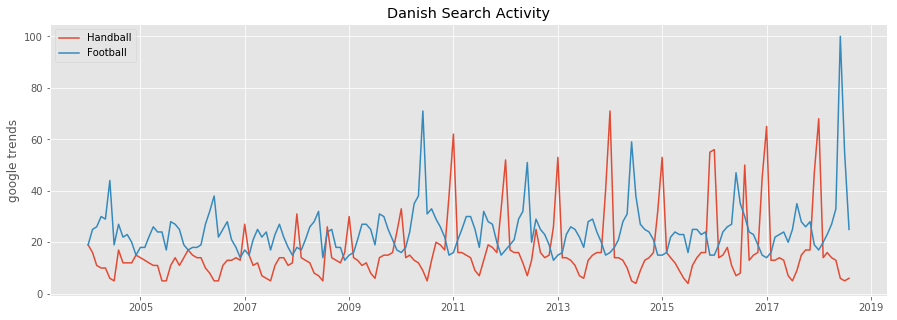

In [33]:
import json # we use the json module to parse the json string.
import matplotlib.pyplot as plt
import datetime # datetime module is used to handle time information in python
%matplotlib inline
plt.style.use('ggplot')
data = json.loads(response.text.split(',',1)[1].strip())
t,y,y1 = zip(*[(i['time'],i['value'][0],i['value'][1]) for i in data['default']['timelineData']])
t = [datetime.datetime.fromtimestamp(int(i)) for i in t]
plt.figure(figsize=(15,5))
plt.plot(t,y,label='Handball')
plt.plot(t,y1,label='Football')
plt.legend()
plt.title('Danish Search Activity')
plt.ylabel('google trends')

** In-class exercise 1** 
* Click on the following link (https://coinmarketcap.com/currencies/bitcoin/#charts)
* open the **>Network Monitor<** of your browser (refresh the page) and figure which request is collecting the data behind the chart. 
* Collect the data using requests.
* Plot the "price_usd" data against time. Data comes as a nested dictionary. 
    * First you need to unpack this.
    * Each datapoint is a [unix timestamp](https://en.wikipedia.org/wiki/Unix_time) in miliseconds and a price. 
    * To plot against time in python, you need to convert it to a datetime object using the ``datetime`` module. 

``t = datetime.datetime.fromtimestamp(unixtime_in_seconds)``

In [2]:
# solution goes here
import requests
link = 'https://graphs2.coinmarketcap.com/currencies/bitcoin/'
d = requests.get(link).json()


Text(0.5,1,'Bitcoin Price in USD')

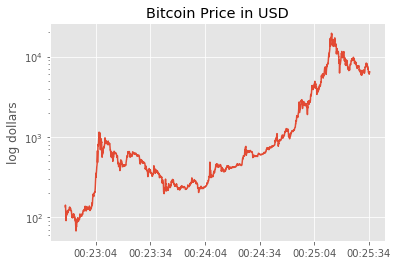

In [46]:
x,y = zip(*d['price_usd']) # zip unpacks values.
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('ggplot') # choose styling
%matplotlib inline

t = [pd.to_datetime(t) for t in x] # convert to datetime object using the pd.to_datetime function
#x = [datetime.datetime.fromtimestamp(i/1000) for i in x] # unixtimestamp in miliseconds converted to datetime object
plt.plot(t,y,label='usd')
plt.yscale('log')# set the scale to log
plt.ylabel('log dollars') # define the label of the y axis
plt.title('Bitcoin Price in USD')


### ** collecting unstructured data **
Step 1. Finding the pages to collect.
Often times we need to crawl a set of pages, from a website, this means finding all the links we need to collect.
Here is a simple example of doing that.

Say we wanted to investigate the difference in how many hours of lectures and exercises the students on different universities and different study programs gets - if the ressources to exercises have been cut over the years, and whether this might affect dropout. To answer this question we decide to scrape the Course description of the university webpages. 

> First we look at the courses on UCPH: 
* Click on this link: https://kurser.ku.dk
* Navigate to a page where links to courses are displayed. 
* Figure out a way to fetch those links.
Here we look for the **"a"**-tag and the **"href"** attribute. 

Use your browsers **>Inspector<** to see the raw html that we want to parse.


In [48]:
# here I have found a list of courses at Anthropology UCPH
url = 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0010'
response = requests.get(url)

In [27]:
#response.text

--------------
After inspecting the html using our browsers Inspector tool, we can see that links occur after a href= pattern. 
Employing the python you already know we can use the ``string.split`` method to fetch the links.
______________

In [49]:
# we split by the pattern 'href="' and
# skip the first element that was before the first occurrece of href
html = response.text
link_locations = html.split('href="')[1:]
links = []

for link_loc in link_locations:
    link = link_loc.split('"')[0]
    links.append(link)
print(len(links))
import random
random.sample(links,10)
links = [link for link in links if '/archive/' in link] # filter the relevant links by checking if '/archive/' is in the link
print(len(links))
# because links are relative to the domain, we add the domain
links = ['https://kurser.ku.dk'+link for link in links]
print(random.sample(links,10))

142
50
['https://kurser.ku.dk/archive/2016-2017/course/AANB11074X', 'https://kurser.ku.dk/archive/2016-2017/course/AANA20002U', 'https://kurser.ku.dk/archive/2016-2017/course/AANB05039U', 'https://kurser.ku.dk/archive/2016-2017/course/AANB11001U', 'https://kurser.ku.dk/archive/2016-2017/course/AANB05023U', 'https://kurser.ku.dk/archive/2016-2017/course/AANB11078U', 'https://kurser.ku.dk/archive/2016-2017/course/AANB11074U', 'https://kurser.ku.dk/archive/2016-2017/course/AANK13515U', 'https://kurser.ku.dk/archive/2016-2017/course/AANB11004U', 'https://kurser.ku.dk/archive/2016-2017/course/AANB05093U']


** In-class exercise 2** Now it your turn to practice collecting links using the simple split method.

The above example only collected links to courses in Anthropology. Now I want you to build a script that
* first collects links to all the different studyboards here: https://kurser.ku.dk/archive/2016-2017

* And next run through those to collect the links to all the courses at UCPH 2016-2017.

* figure out how to get links from the other years (hint look at the urls).


In [50]:
# solution goes here
url = 'https://kurser.ku.dk/archive/2016-2017'
response = requests.get(url)
html = response.text
link_locations = html.split('href="')[1:]
study_boards = []
for link_loc in link_locations:
    link = link_loc.split('"')[0]
    study_boards.append(link)
    
clue = '2016-2017'
study_boards = ['https://kurser.ku.dk/archive/'+link for link in study_boards if clue in link]

print(study_boards)

['https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0010', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0032', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0018', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0071', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0021', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0044', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0009', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_PHD_0015', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_PB_01', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0012', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0033', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0025', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0026', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_MA_0002', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0019', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0113', 'https://kurser.ku.dk/archive/2016-2017/STUDYBOARD_0054', 'http

## Navigating websites to collect links
Now I will show you a few common ways of finding the links to the pages you want to scrape.

### Building URLS using a recognizable pattern.
A nice trick is to understand how urls are constructed to communicate with a server. 

Lets look at how [jobindex.dk](https://www.jobindex.dk/) does it. We simply click around and take note at how the addressline changes.

This will allow us to navigate the page, without having to parse information from the html or click any buttons.

* / is like folders on your computer.
* ? entails the start of a query with parameters 
* = defines a variable: e.g. page=1000 or offset = 100 or showNumber=20
* & separates different parameters.
* \+ is html for whitespace

## Good practices
* Transparency: send your email and name in the header so webmasters will know you are not a malicious actor.
* Ratelimiting: Make sure you don't hit their servers to hard.
* Reliability: 
    * Make sure the scraper can handle exceptions (e.g. bad connection) without crashing.
    * Keep a log.
    * Store raw data.


In [5]:
# Transparent scraping
import requests
#response = requests.get('https://www.google.com')
session = requests.session()
session.headers['email'] = 'youremail' 
session.headers['name'] = 'name'
#session.headers['User-Agent'] = '' # sometimes you need to pose as another agent...
session.headers

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'email': 'youremail', 'name': 'name'}

A quick tip is that you can change the user agent to a cellphone to obtain more simple formatting of the html. 

# Reliability!
When using found data, you are the curator and you are **responsible** for enscribing **trust** in the datacompilation.

Reliability is ensured by an interative process, of inspection, error detection and error handling.

Build your scrape around making this process easy by:
* logging information about the collection (e.g. servertime, size of response to plot weird behavior, size of response over time,  number of calls pr day, detection of holes in your data).
* Storing raw data (before parsing it) to be able to backtrack problems, without having to wait for the error to come up.  

In [45]:
# Control the pace of your calls
import time
def ratelimit():
    "A function that handles the rate of your calls."
    time.sleep(1) # sleep one second.
# Reliable requests
def get(url,iterations=10,check_function=lambda x: x.ok):
    """This module ensures that your script does not crash from connection errors.
        that you limit the rate of your calls
        that you have some reliability check
        iterations : Define number of iterations before giving up. 
        exceptions: Define which exceptions you accept, default is all. 
    """
    for iteration in range(iterations):
        try:
            # add ratelimit function call here
            ratelimit() # !!
            response = session.get(url)
            if check_function(response):
                return response # if succesful it will end the iterations here
        except exceptions as e: #  find exceptions in the request library requests.exceptions
            print(e) # print or log the exception message.
    return None # your code will purposely crash if you don't create a check function later.

### Logs



### Example of a logging function
``` python 
done = set()# define a container for the links you have already collected
count = 0
def log_function(url,response,error_check=lambda x: x.ok,separator=','):
    global last_t
    if os.path.isfile(logfilepath)
        f_log = open(logfilepath,'w') # define logfile, remember not to overwrite it.
        # write columns to be used, basic ones are, servertime, deltaT since last call, url, success of request, 
        header = ['serverTime','deltaT','url','success','length','path']
        f_log.write(','.join(header)+'\n')
    else:
        f_log = open(logfilepath,'a')
    #### Update timing info ####
    t = time.time()
    delta_t = t-last_t # calculate time since last call
    last_t = t# update last call time
    #### meta data ### 
    success = error_check(response)
    if success: # if call is successfull we add it to the done container
        done.add(url)
    if response.ok:
        length = len(response.text)
    else:
        length = 0
    row = [t,delta_t,url,success,length,path]
    f_log.write(separator.join(map(str,row))+'\n')
``` 


``` python 
base_path = 'path_to_dir/%d'
for link in links:
    if link in done: #check if you have already downloaded the link
        continue
    count +=1
    response = requests.get(link)
    #define path 
    path = base_path%count # use the link count as a filename
    if response.ok:
        html = response.text
        f.write(path,response+'\n\r')
    # run your log function
    log_function()
``` 
    

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'height': 768, 'scroll': True, 'width': 1024}